# Setup

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training = pd.read_csv('playground-series-s5e12/train.csv', index_col='id')
testing = pd.read_csv('playground-series-s5e12/test.csv', index_col='id')

training.head(5)

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
id,,,,,,,,,,,,,,,,,,,,,
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


# EDA

In [3]:
training.shape

(700000, 25)

In [4]:
print(training.isnull().sum())
print()
print(training.isna().sum())

age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
diagnosed_diabetes                    0


In [5]:
training.info()
training.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 700000 entries, 0 to 699999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 700000 non-null  int64  
 1   alcohol_consumption_per_week        700000 non-null  int64  
 2   physical_activity_minutes_per_week  700000 non-null  int64  
 3   diet_score                          700000 non-null  float64
 4   sleep_hours_per_day                 700000 non-null  float64
 5   screen_time_hours_per_day           700000 non-null  float64
 6   bmi                                 700000 non-null  float64
 7   waist_to_hip_ratio                  700000 non-null  float64
 8   systolic_bp                         700000 non-null  int64  
 9   diastolic_bp                        700000 non-null  int64  
 10  heart_rate                          700000 non-null  int64  
 11  cholesterol_total              

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,...,700000,700000,700000,700000,700000,700000,700000.000000,700000.000000,700000.000000,700000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,5,4,5,3,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,White,Highschool,Middle,Never,Employed,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,363237,386153,344145,290557,494448,516170,NaN,NaN,NaN,NaN
mean,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,...,NaN,NaN,NaN,NaN,NaN,NaN,0.149401,0.181990,0.030324,0.623296
std,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,...,NaN,NaN,NaN,NaN,NaN,NaN,0.356484,0.385837,0.171478,0.484560
min,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000
75%,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000


In [6]:
def get_vars(df, exclude_cols=None):
    """
    Identify variable types based on dtype + unique counts.

    Returns:
        {
            "numerical_vars": ...,
            "categorical_vars": ...,
            "continuous_vars": ...,
            "discrete_vars": ...,
            "binary_vars": ...,
            "true_numerical_vars": ...,
            "true_categorical_vars": ...,
            "all_vars": ...
        }
    """
    if exclude_cols is None:
        exclude_cols = []

    # --------------------
    # Base variable groups
    # --------------------
    numerical_vars = df.select_dtypes(include=["number"]).columns.tolist()
    categorical_vars = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

    # Remove excluded columns from each list
    numerical_vars = [c for c in numerical_vars if c not in exclude_cols]
    categorical_vars = [c for c in categorical_vars if c not in exclude_cols]

    # --------------------
    # Continuous vs Discrete
    # --------------------
    continuous_vars = []
    discrete_vars = []

    n_rows = len(df)

    for col in numerical_vars:
        n_unique = df[col].nunique(dropna=True)

        if (n_unique <= 10) or (df[col].dtype.kind in "iu" and n_unique / n_rows < 0.01):
            discrete_vars.append(col)
        else:
            continuous_vars.append(col)

    # --------------------
    # Binary detection (among discrete vars)
    # --------------------
    binary_vars = []
    nonbinary_discrete = discrete_vars.copy()

    for col in nonbinary_discrete.copy():
        unique_vals = df[col].dropna().unique()
        n_unique = len(unique_vals)

        if n_unique == 2:
            binary_vars.append(col)
            discrete_vars.remove(col)

    # --------------------
    # Final "true" groups
    # --------------------
    true_numerical_vars = continuous_vars + discrete_vars
    true_categorical_vars = categorical_vars + binary_vars
    all_vars = true_numerical_vars + true_categorical_vars

    # --------------------
    # Return everything
    # --------------------
    return {
        "numerical_vars": numerical_vars,
        "categorical_vars": categorical_vars,
        "continuous_vars": continuous_vars,
        "discrete_vars": discrete_vars,
        "binary_vars": binary_vars,
        "true_numerical_vars": true_numerical_vars,
        "true_categorical_vars": true_categorical_vars,
        "all_vars": all_vars
    }

vars_dict = get_vars(training, ["diagnosed_diabetes"])

print("Numerical:", vars_dict["numerical_vars"])
print("Categorical:", vars_dict["categorical_vars"])
print("Continuous:", vars_dict["continuous_vars"])
print("Discrete:", vars_dict["discrete_vars"])
print("Binary:", vars_dict["binary_vars"])
print("True numerical:", vars_dict["true_numerical_vars"])
print("True categorical:", vars_dict["true_categorical_vars"])
print("All vars:", vars_dict["all_vars"])

Numerical: ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']
Categorical: ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']
Continuous: ['diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio']
Discrete: ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides']
Binary: ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history']
True numerical: ['diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_

## Outlier Checking

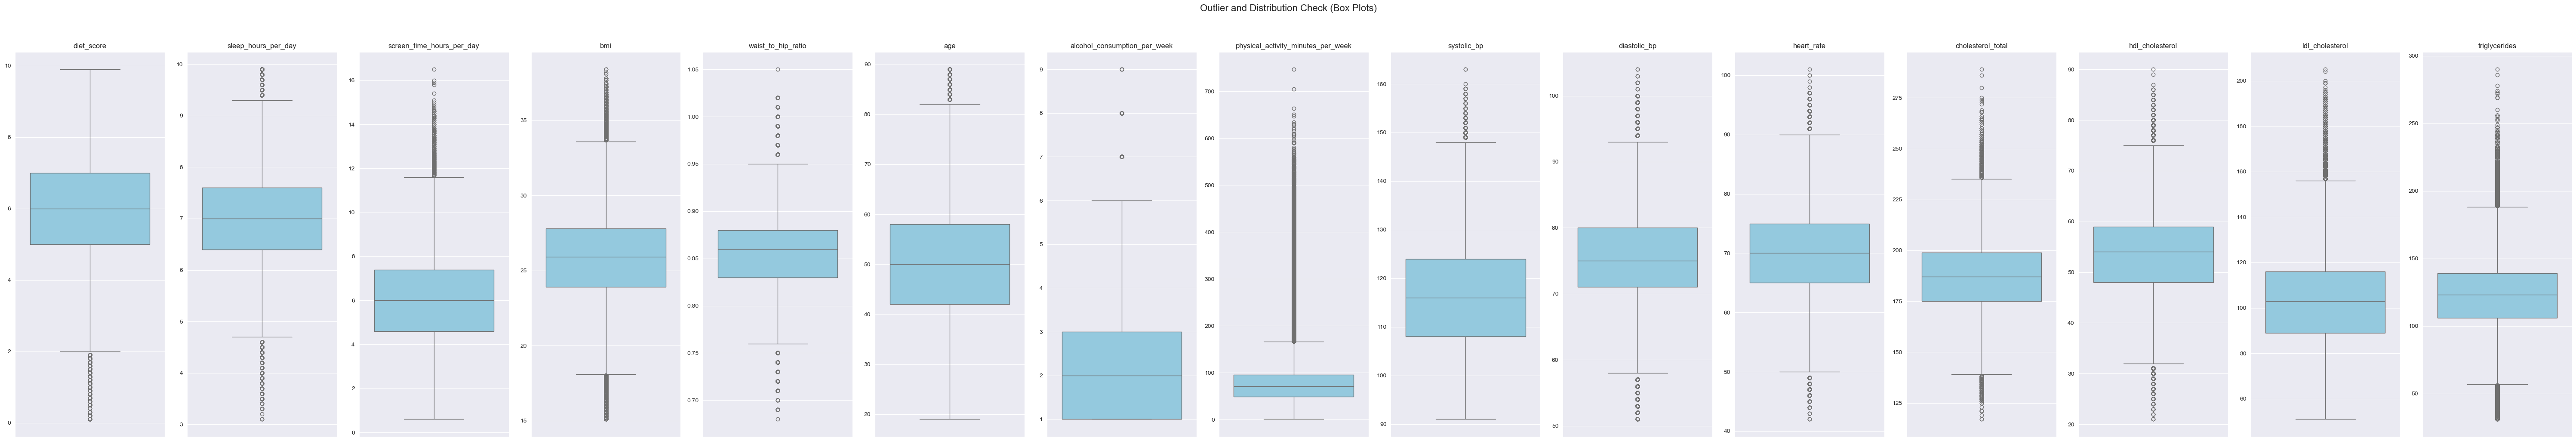

In [7]:
ncols = len(vars_dict["true_numerical_vars"])

fig, axes = plt.subplots(1, ncols, figsize=(4 * ncols, 10))
plt.suptitle("Outlier and Distribution Check (Box Plots)", fontsize=16, y=1.02)

for i, col in enumerate(vars_dict["true_numerical_vars"]):
    sns.boxplot(y=training[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Splitting and Preparing the Data

In [8]:
from sklearn.model_selection import train_test_split

SEED = 42

X = training[vars_dict["all_vars"]]
y = training["diagnosed_diabetes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=SEED
)

print(X_train.shape, X_test.shape)
print(y_train.value_counts())

(490000, 24) (210000, 24)
diagnosed_diabetes
1.0    305131
0.0    184869
Name: count, dtype: int64


Training data is skewed. So I will use bootstrapping on my training data.

In [9]:
from sklearn.utils import resample

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
train_data = pd.concat([X_train, y_train], axis=1)

majority = train_data[train_data.diagnosed_diabetes == 1]
minority = train_data[train_data.diagnosed_diabetes == 0]

minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=SEED)

train_data_balanced = pd.concat([majority, minority_upsampled])
train_data_balanced = train_data_balanced.sample(frac=1, random_state=SEED).reset_index(drop=True)

X_train = train_data_balanced.drop('diagnosed_diabetes', axis=1)
y_train = train_data_balanced['diagnosed_diabetes']

print(f"Balanced Train Counts:\n{y_train.value_counts()}")

Balanced Train Counts:
diagnosed_diabetes
1.0    305131
0.0    305131
Name: count, dtype: int64


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_num = scaler.fit_transform(X_train[vars_dict["true_numerical_vars"]])
X_train_scaled_df = pd.DataFrame(
    X_train_scaled_num,
    columns=vars_dict["true_numerical_vars"],
    index=X_train.index
)

X_test_scaled_num = scaler.transform(X_test[vars_dict["true_numerical_vars"]])
X_test_scaled_df = pd.DataFrame(
    X_test_scaled_num,
    columns=vars_dict["true_numerical_vars"],
    index=X_test.index
)

In [11]:
X_train = pd.get_dummies(X_train[vars_dict["true_categorical_vars"]], drop_first=True)
X_test = pd.get_dummies(X_test[vars_dict["true_categorical_vars"]], drop_first=True)

X_train_encoded, X_test_encoded = X_train.align(
    X_test,
    join='left',
    axis=1,
    fill_value=0
)

print(f"Encoded Shape Train: {X_train_encoded.shape}, Test: {X_test_encoded.shape}")

X_train = pd.concat([X_train_scaled_df, X_train_encoded], axis=1)
X_test = pd.concat([X_test_scaled_df, X_test_encoded], axis=1)

print(f"Final Feature Shape Train: {X_train.shape}, Test: {X_test.shape}")

Encoded Shape Train: (610262, 21), Test: (210000, 21)
Final Feature Shape Train: (610262, 36), Test: (210000, 36)


In [12]:
X_train.head()

,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,systolic_bp,diastolic_bp,...,education_level_Postgraduate,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,smoking_status_Former,smoking_status_Never,employment_status_Retired,employment_status_Student,employment_status_Unemployed
0,1.785588,0.552806,0.245210,-0.627645,0.317228,0.184502,-1.021358,-0.572585,1.823945,-1.374273,...,True,False,False,True,False,True,False,False,False,False
1,1.103056,1.108131,0.393594,0.001493,0.317228,0.270440,-1.021358,-0.967028,0.640708,-0.494817,...,False,False,False,True,False,True,False,False,False,False
2,0.693537,0.330676,-0.249406,0.980154,0.317228,-2.393653,-0.066504,0.047253,-1.179657,-1.960578,...,False,False,False,True,False,False,False,False,False,False
3,0.079259,-0.113584,1.283903,-0.208219,-0.472620,-0.331129,-0.066504,0.141168,-2.089840,0.238064,...,False,False,False,True,False,False,True,False,False,False
4,-0.057248,-0.779973,-0.101021,-0.452884,1.370358,-1.104576,-1.021358,-0.666500,-0.451511,-1.960578,...,False,False,True,False,False,False,True,False,False,False


# Evaluation Function

In [16]:
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

def evaluate_and_graph(model, X_train, y_train, X_test, y_test, name, graph):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    if hasattr(model, "predict_proba"):
        y_prob_test = model.predict_proba(X_test)[:, 1]
        y_prob_train = model.predict_proba(X_train)[:, 1]
    else:
        y_prob_test = model.decision_function(X_test)
        y_prob_train = model.decision_function(X_train)

    test_acc = accuracy_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_prob_test)
    test_ap = average_precision_score(y_test, y_prob_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_prob_train)

    print(f"--- {name} ---")
    print(f"Train Accuracy: {train_acc:.4f} | Train AUC: {train_auc:.4f}")
    print(f"Test  Accuracy: {test_acc:.4f} | Test  AUC: {test_auc:.4f}")

    if (train_acc - test_acc) > 0.05:
         print("⚠️ Warning: Signs of Overfitting (Train is much better than Test)")
    else:
         print("✅ Model seems balanced")
    print("-" * 30)

    fpr, tpr, _ = roc_curve(y_test, y_prob_test)
    precision, recall, _ = precision_recall_curve(y_test, y_prob_test)

    if graph:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # --- Plot 1: ROC Curve ---
        axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {test_auc:.3f}')
        axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
        axes[0].set_xlim([0.0, 1.0])
        axes[0].set_ylim([0.0, 1.05])
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].set_title(f'ROC Curve: {name}')
        axes[0].legend(loc="lower right")
        axes[0].grid(True, alpha=0.3)

        # --- Plot 2: Precision-Recall Curve ---
        # "No Skill" baseline is just the percentage of positive cases
        no_skill = y_test.mean()

        axes[1].plot(recall, precision, color='green', lw=2, label=f'Avg Precision = {test_ap:.3f}')
        axes[1].plot([0, 1], [no_skill, no_skill], color='navy', linestyle='--', label='No Skill')
        axes[1].set_xlim([0.0, 1.0])
        # because the test is not balanced, I will only graph some of the PR curve to make it more readable
        axes[1].set_ylim([0.5, 1.05])
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].set_title(f'PR Curve: {name}')
        axes[1].legend(loc="upper right")
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    return {
        "model": name,
        "accuracy": test_acc,
        "auc": test_auc,
        "average_precision": test_ap,
        "train_accuracy": train_acc,
        "train_auc": train_auc
    }

# PLA Pocket

--- PLA ---
Train Accuracy: 0.5238 | Train AUC: 0.5379
Test  Accuracy: 0.5130 | Test  AUC: 0.5384
✅ Model seems balanced
------------------------------


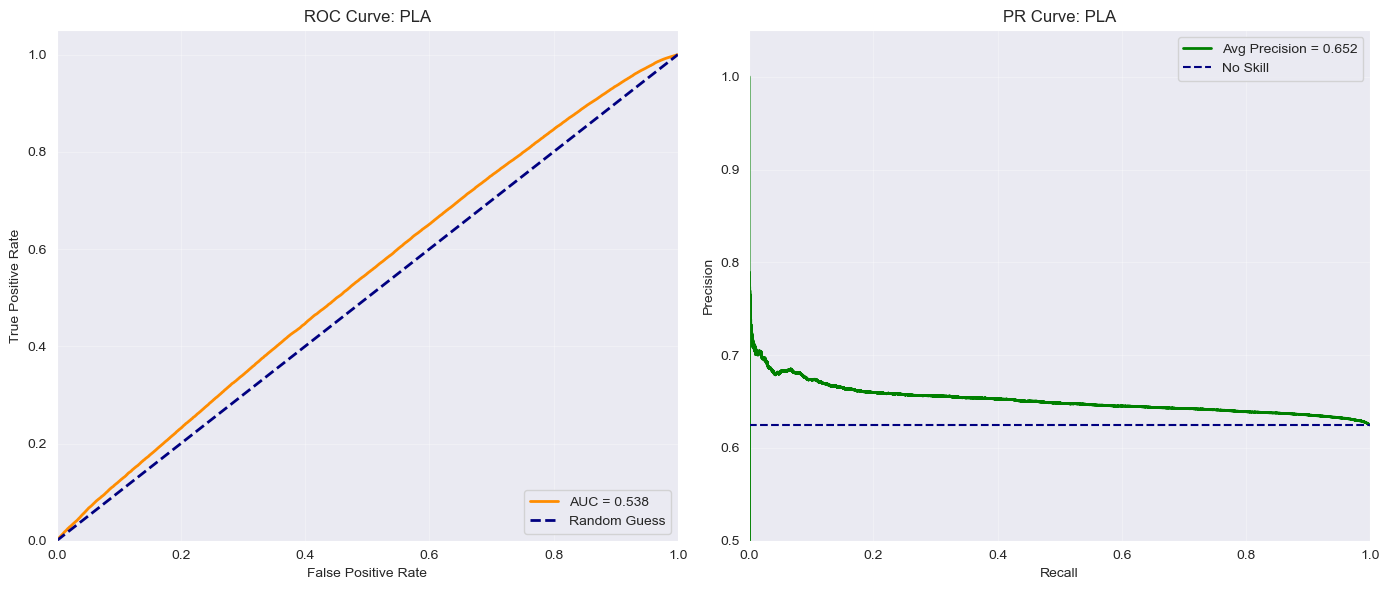

In [17]:
from sklearn.linear_model import Perceptron

results = []

pla = Perceptron(max_iter=1000, random_state=SEED)
results.append(
    evaluate_and_graph(pla, X_train, y_train, X_test, y_test, "PLA", True)
)

# Logistic Regression Model

--- Logistic Regression ---
Train Accuracy: 0.6378 | Train AUC: 0.6961
Test  Accuracy: 0.6285 | Test  AUC: 0.6953
✅ Model seems balanced
------------------------------


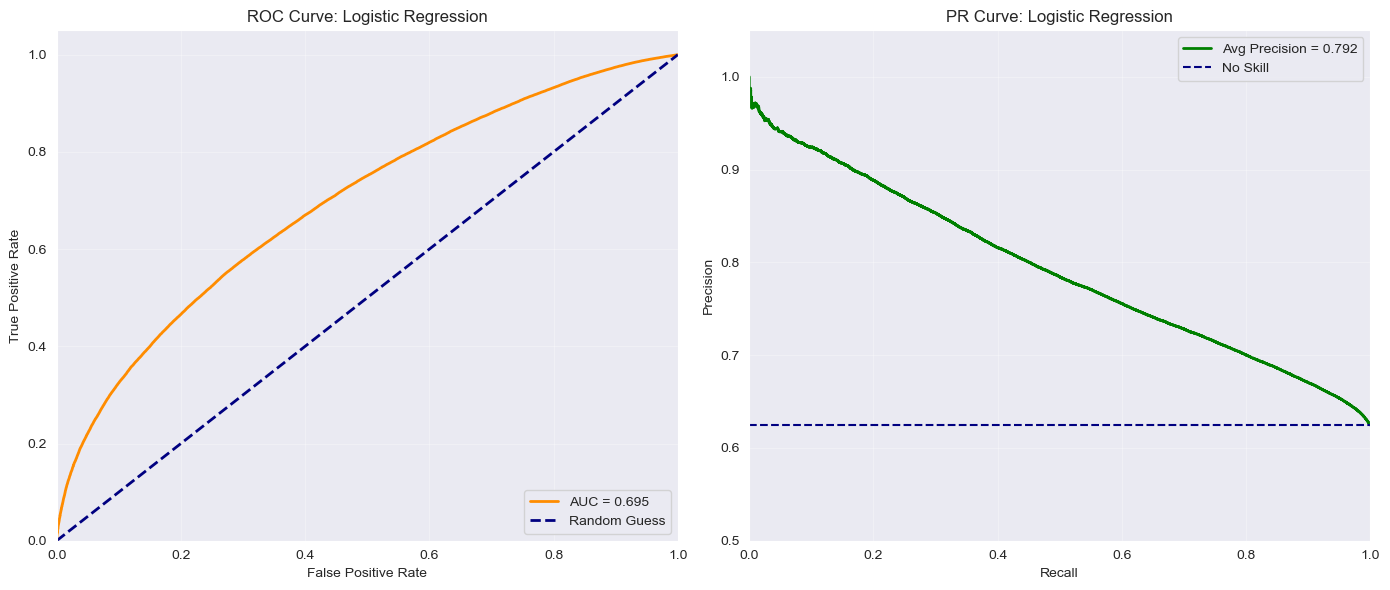

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
results.append(
    evaluate_and_graph(lr, X_train, y_train, X_test, y_test, "Logistic Regression", True)
)

# Softmax

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1262: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


--- Softmax Regression ---
Train Accuracy: 0.6378 | Train AUC: 0.6961
Test  Accuracy: 0.6286 | Test  AUC: 0.6953
✅ Model seems balanced
------------------------------


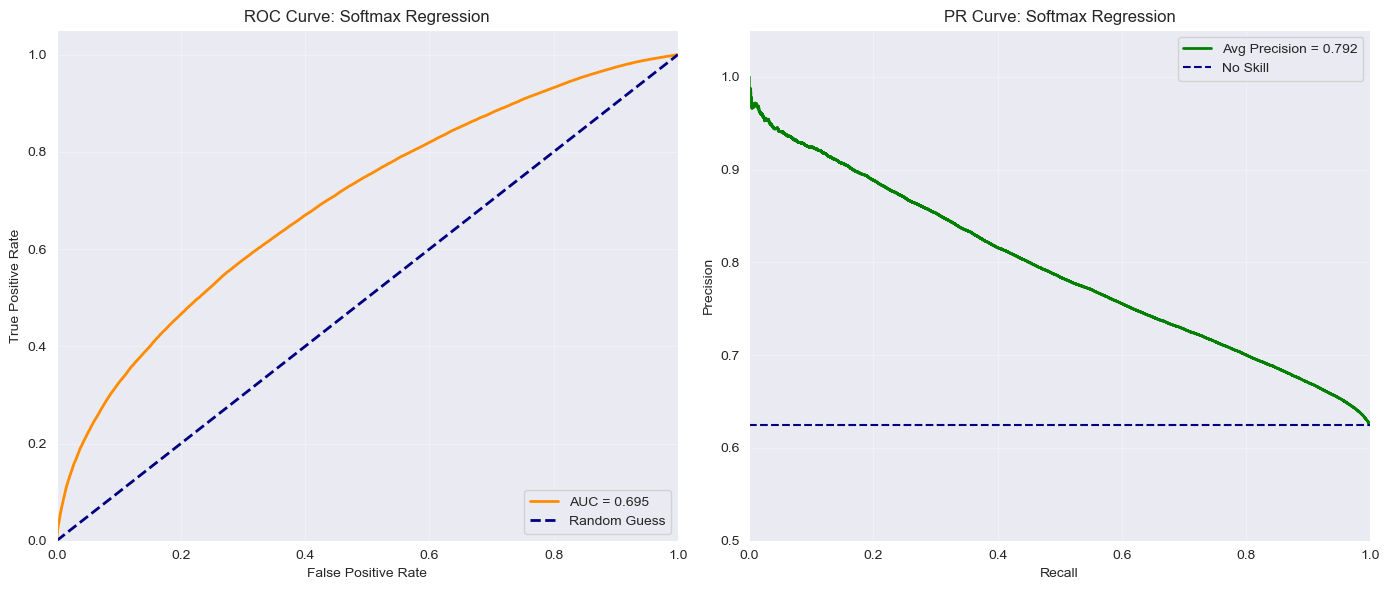

In [19]:
softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=SEED)
results.append(
    evaluate_and_graph(softmax, X_train, y_train, X_test, y_test, "Softmax Regression", True)
)

# LDA

--- LDA ---
Train Accuracy: 0.6375 | Train AUC: 0.6955
Test  Accuracy: 0.6265 | Test  AUC: 0.6948
✅ Model seems balanced
------------------------------


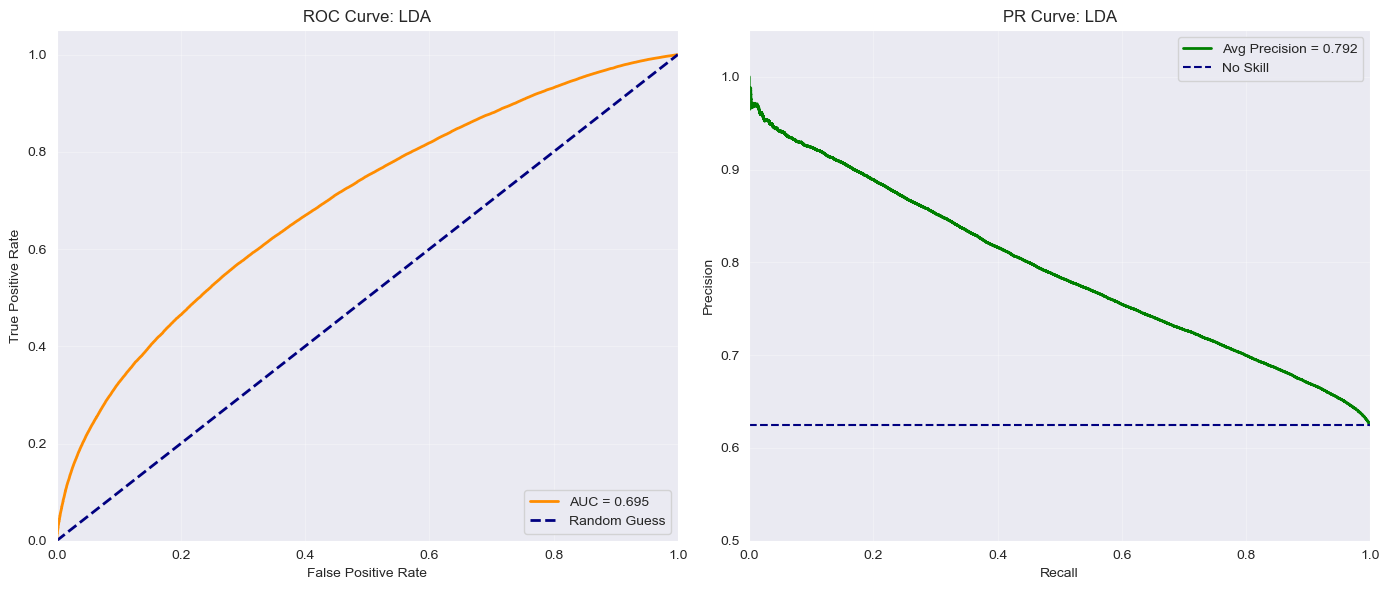

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
results.append(
    evaluate_and_graph(lda, X_train, y_train, X_test, y_test, "LDA", True)
)

# QDA

--- QDA ---
Train Accuracy: 0.6341 | Train AUC: 0.6911
Test  Accuracy: 0.6178 | Test  AUC: 0.6893
✅ Model seems balanced
------------------------------


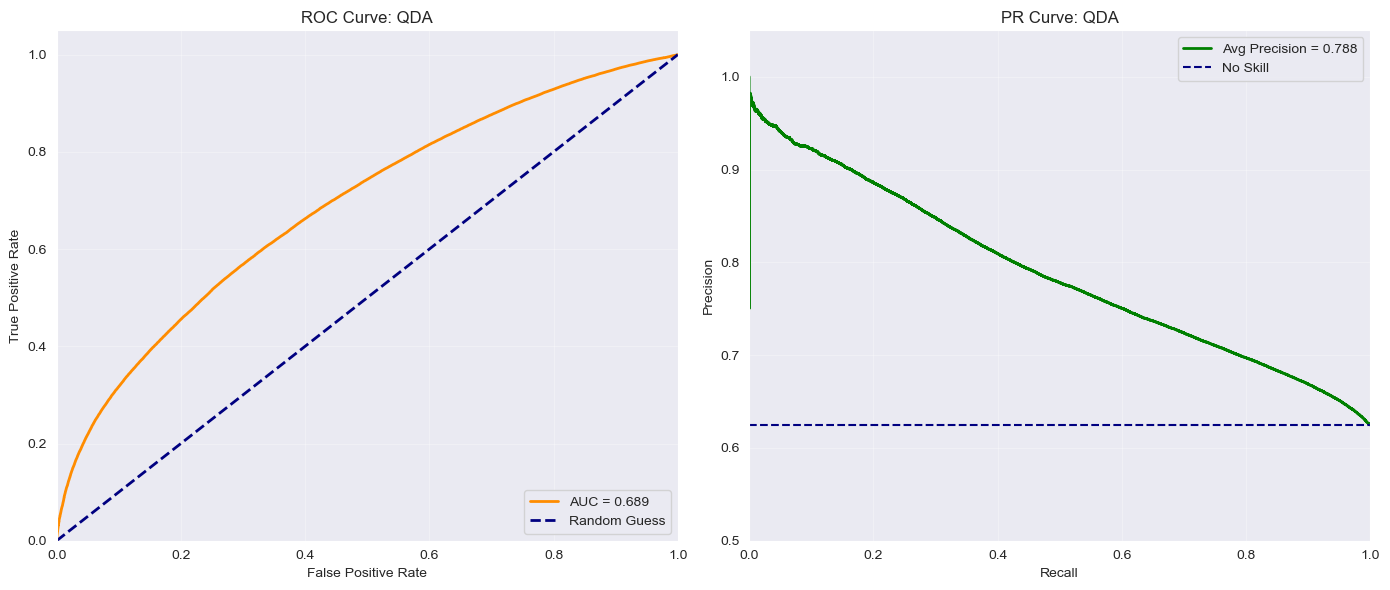

In [21]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(reg_param=0.1)
results.append(
    evaluate_and_graph(qda, X_train, y_train, X_test, y_test, "QDA", True)
)

# Naive Bayes (Gaussian and Bernoulli)

--- Naive Bayes (Gaussian) ---
Train Accuracy: 0.6221 | Train AUC: 0.6780
Test  Accuracy: 0.5909 | Test  AUC: 0.6770
✅ Model seems balanced
------------------------------


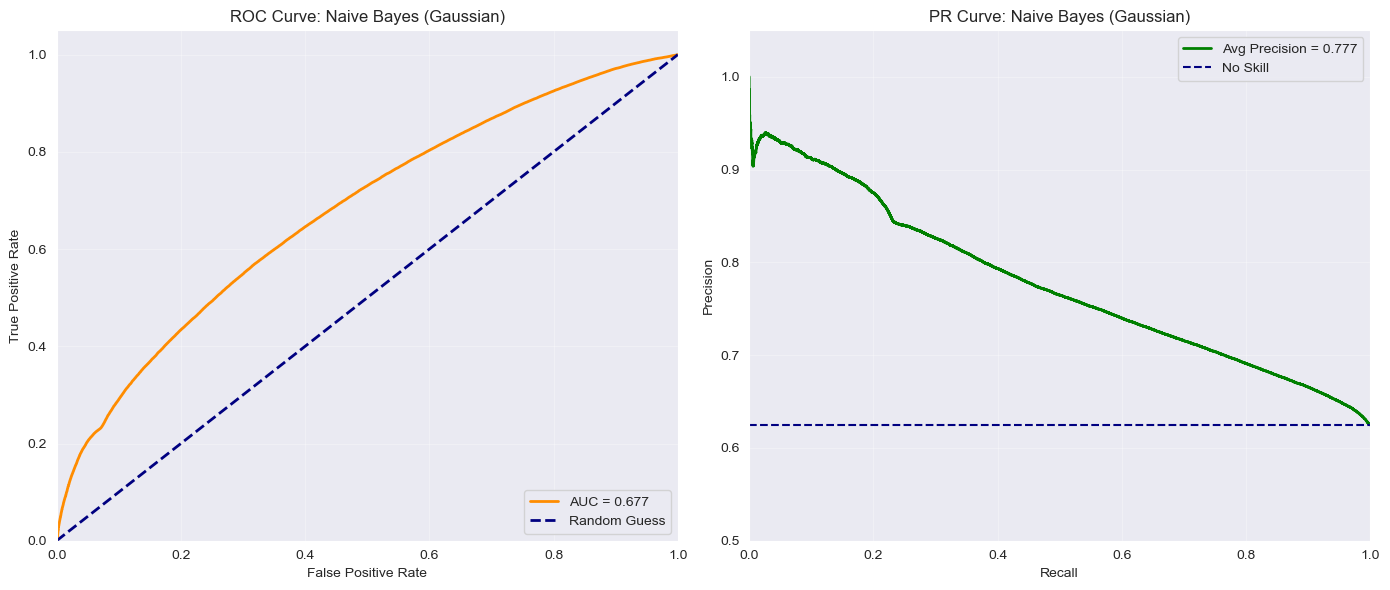

--- Naive Bayes (Bernoulli) ---
Train Accuracy: 0.6177 | Train AUC: 0.6664
Test  Accuracy: 0.6147 | Test  AUC: 0.6660
✅ Model seems balanced
------------------------------


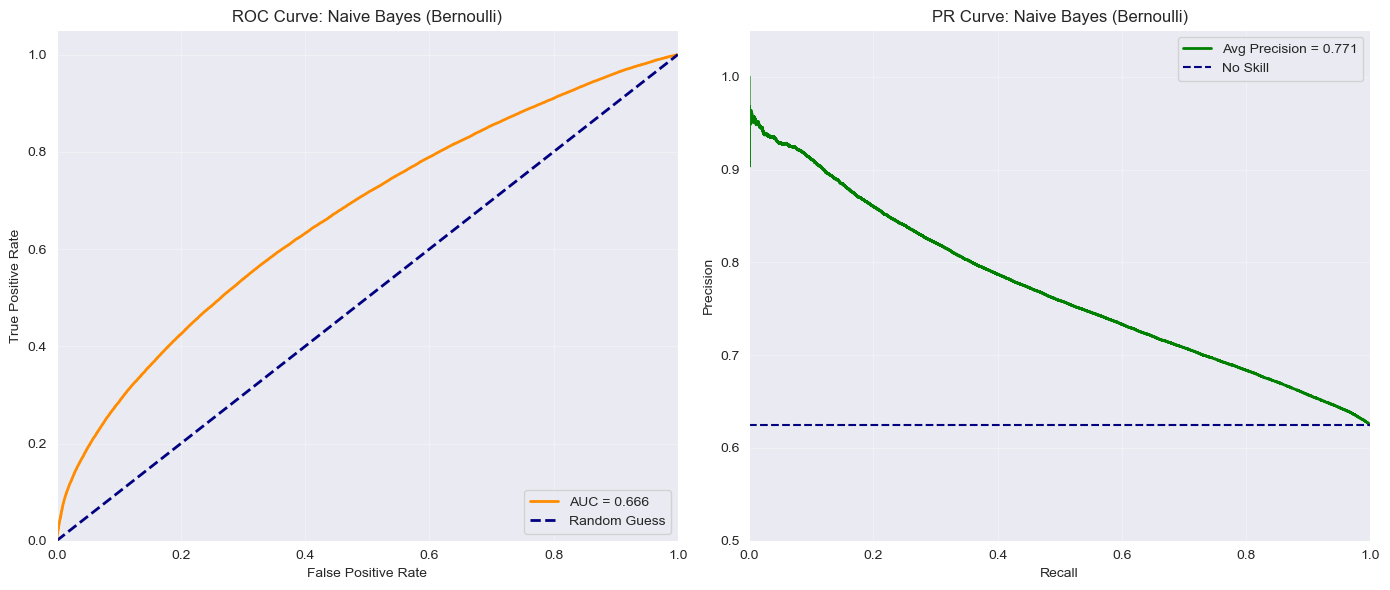

In [22]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

gnb = GaussianNB()
results.append(
    evaluate_and_graph(gnb, X_train, y_train, X_test, y_test, "Naive Bayes (Gaussian)", True)
)

bnb = BernoulliNB()
results.append(
    evaluate_and_graph(bnb, X_train, y_train, X_test, y_test, "Naive Bayes (Bernoulli)", True)
)

# SVM (Linear, Polynomial, and RBF)

SVM can take a long time O(n^3) so I made mini datasets to train on

In [23]:
from sklearn.model_selection import train_test_split

X_train_mini, _, y_train_mini, _ = train_test_split(
    X_train,
    y_train,
    train_size=10_000,
    stratify=y_train,
    random_state=SEED
)

X_test_mini, _, y_test_mini, _ = train_test_split(
    X_test,
    y_test,
    train_size=10_000,
    stratify=y_test,
    random_state=SEED
)

print(X_train_mini.shape, y_train_mini.shape)
print(X_test_mini.shape, y_test_mini.shape)

(10000, 36) (10000,)
(10000, 36) (10000,)


--- SVM (Linear) ---
Train Accuracy: 0.6411 | Train AUC: 0.7021
Test  Accuracy: 0.6176 | Test  AUC: 0.6891
✅ Model seems balanced
------------------------------


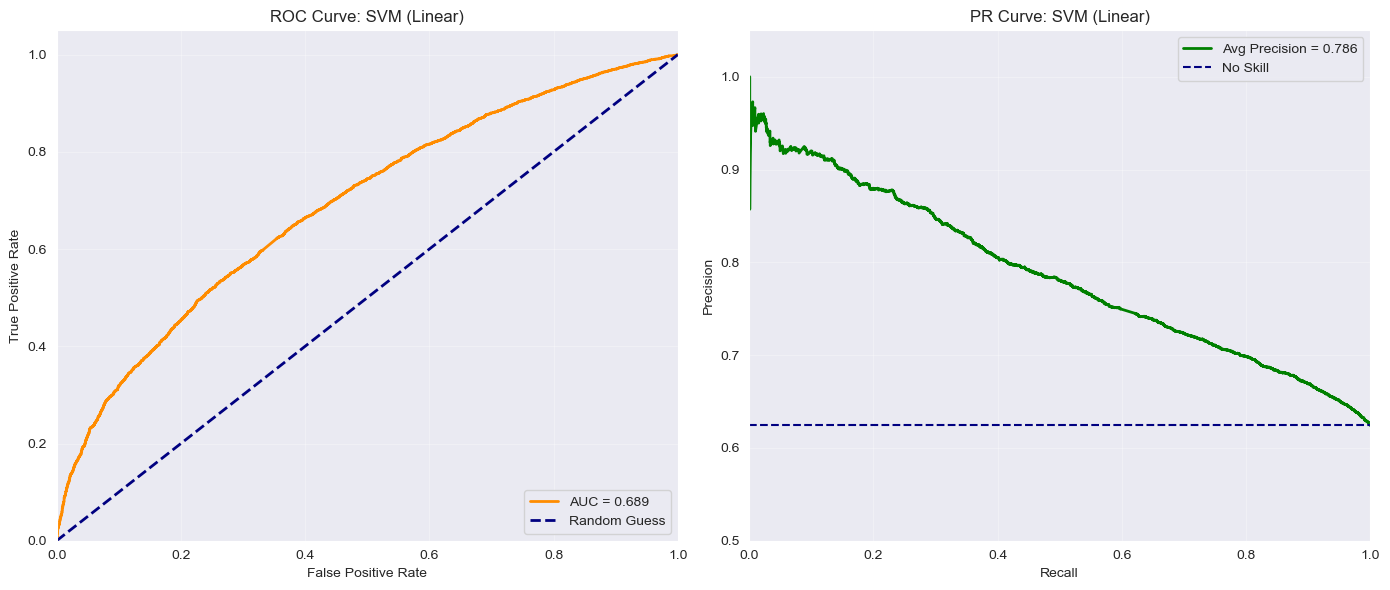

--- SVM (Polynomial) ---
Train Accuracy: 0.7392 | Train AUC: 0.8185
Test  Accuracy: 0.5902 | Test  AUC: 0.6488
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


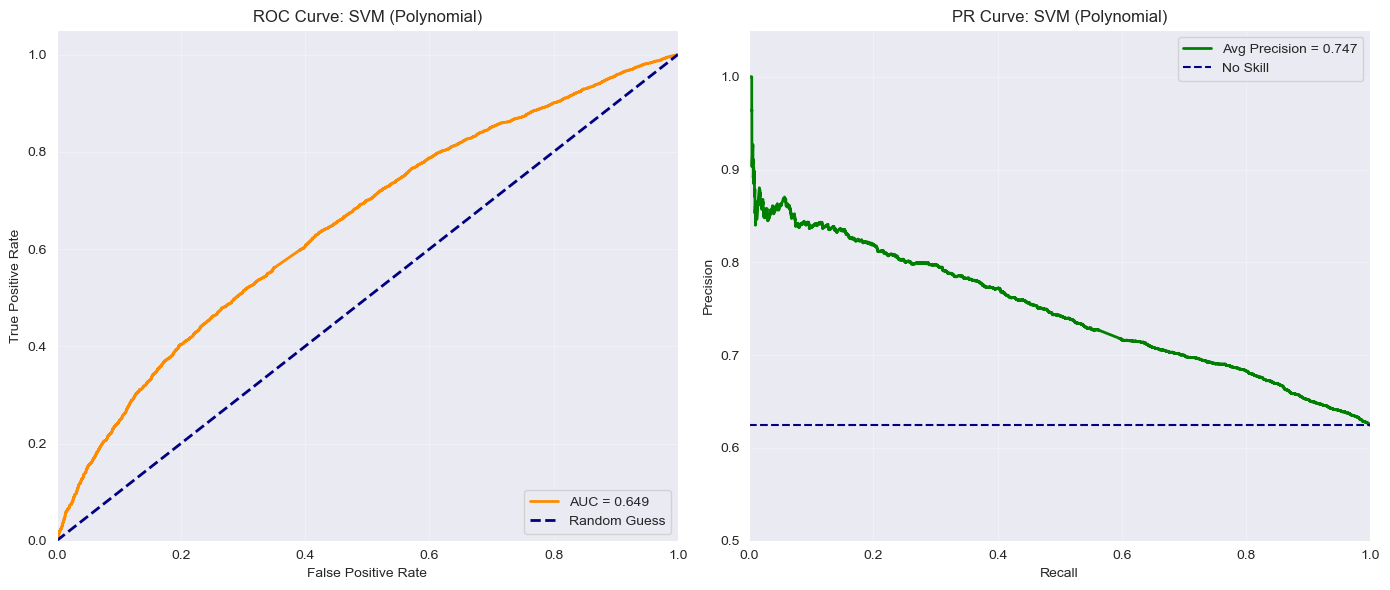

--- SVM (RBF) ---
Train Accuracy: 0.7270 | Train AUC: 0.8098
Test  Accuracy: 0.6101 | Test  AUC: 0.6713
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


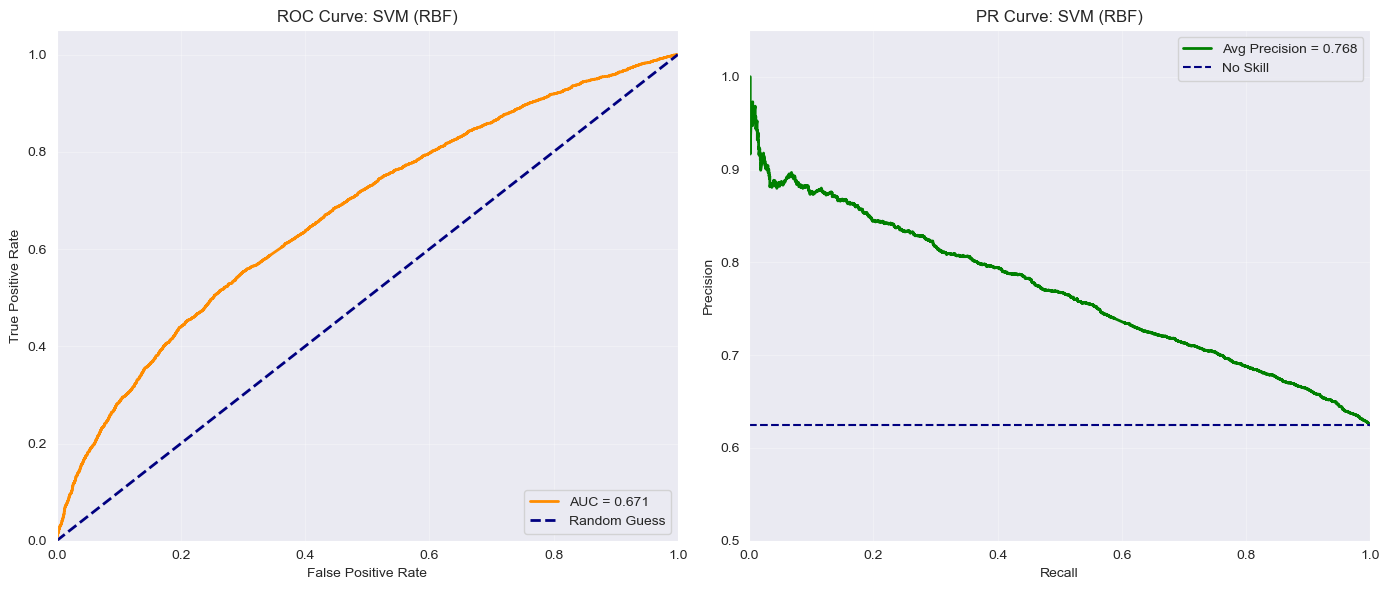

In [24]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', probability=True, random_state=SEED)
results.append(
    evaluate_and_graph(svm_linear, X_train_mini, y_train_mini, X_test_mini, y_test_mini, "SVM (Linear)", True)
)

svm_poly = SVC(kernel='poly', degree=3, probability=True, random_state=SEED)
results.append(
    evaluate_and_graph(svm_poly, X_train_mini, y_train_mini, X_test_mini, y_test_mini, "SVM (Polynomial)", True)
)

svm_rbf = SVC(kernel='rbf', probability=True, random_state=SEED)
results.append(
    evaluate_and_graph(svm_rbf, X_train_mini, y_train_mini, X_test_mini, y_test_mini, "SVM (RBF)", True)
)

# Decision Trees (Gini and Entropy)

--- Decision Tree (Gini) ---
Train Accuracy: 0.6476 | Train AUC: 0.7098
Test  Accuracy: 0.6245 | Test  AUC: 0.6892
✅ Model seems balanced
------------------------------


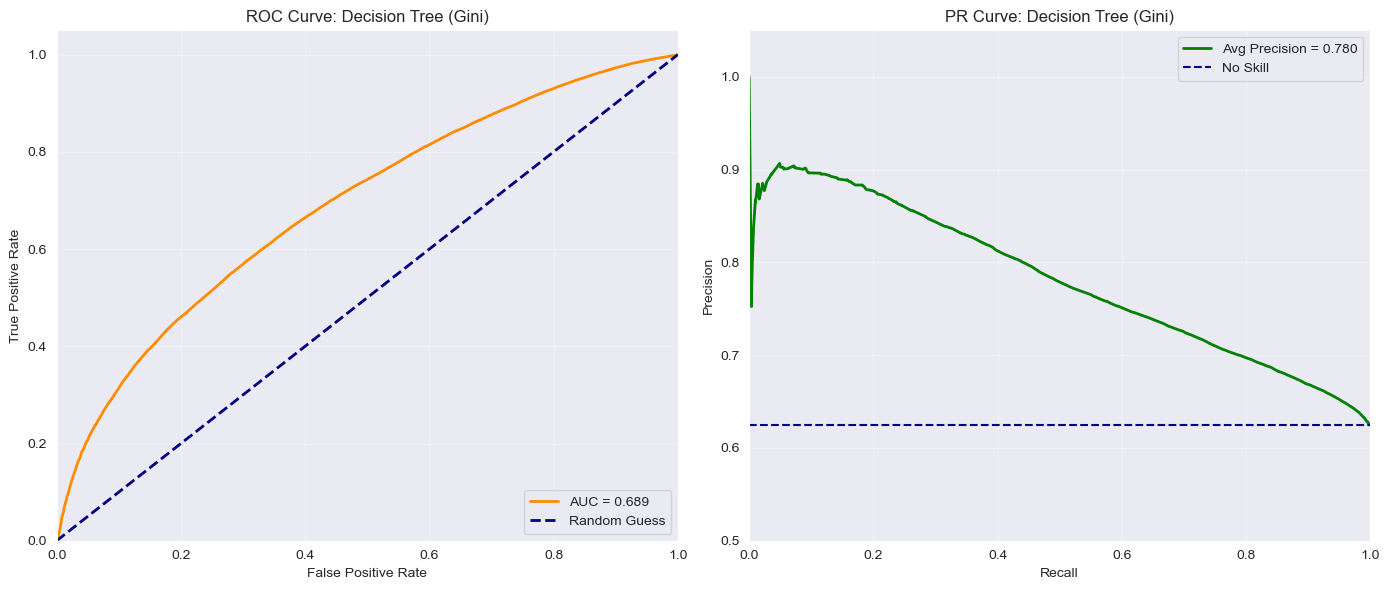

--- Decision Tree (Entropy) ---
Train Accuracy: 0.6459 | Train AUC: 0.7077
Test  Accuracy: 0.6266 | Test  AUC: 0.6906
✅ Model seems balanced
------------------------------


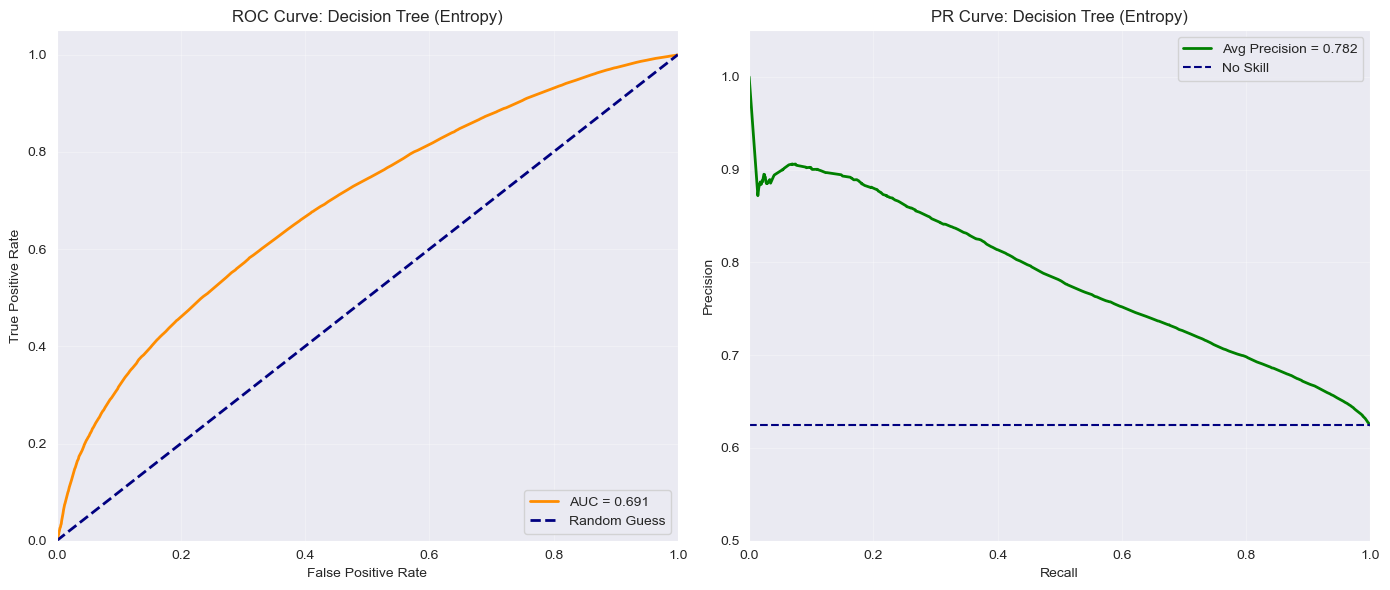

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=SEED)
results.append(
    evaluate_and_graph(dt_gini, X_train, y_train, X_test, y_test, "Decision Tree (Gini)", True)
)

dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=SEED)
results.append(
    evaluate_and_graph(dt_entropy, X_train, y_train, X_test, y_test, "Decision Tree (Entropy)", True)
)

# Bagging

--- Bagging (Trees) ---
Train Accuracy: 1.0000 | Train AUC: 1.0000
Test  Accuracy: 0.6586 | Test  AUC: 0.6871
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


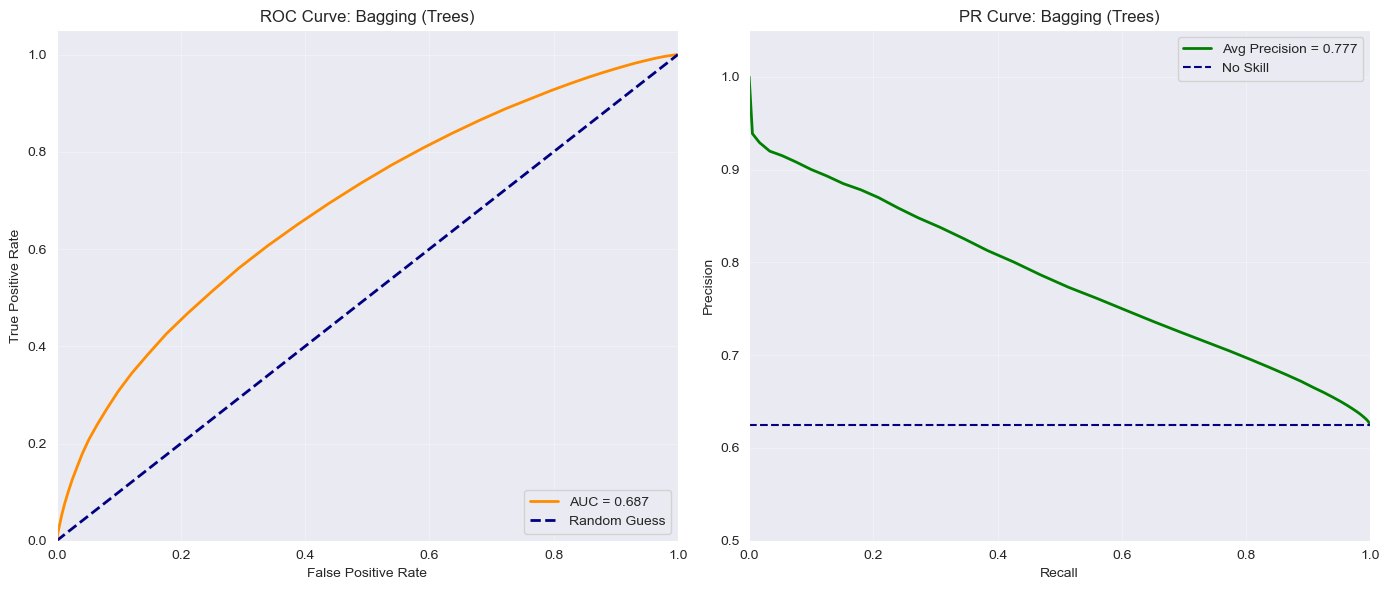

In [26]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators=50, random_state=SEED)
results.append(
    evaluate_and_graph(bagging, X_train, y_train, X_test, y_test, "Bagging (Trees)", True)
)

# Random Forest Classifier Model

--- Random Forest ---
Train Accuracy: 0.6537 | Train AUC: 0.7175
Test  Accuracy: 0.6290 | Test  AUC: 0.6980
✅ Model seems balanced
------------------------------


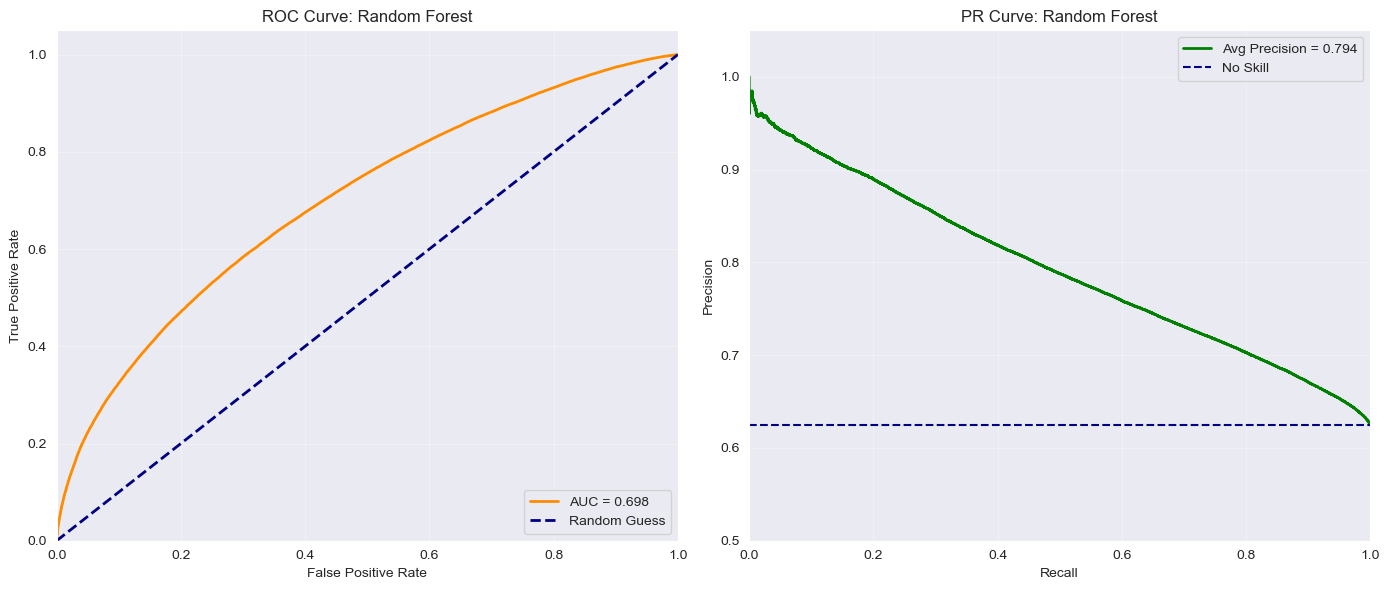

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=SEED)
results.append(
    evaluate_and_graph(rf, X_train, y_train, X_test, y_test, "Random Forest", True)
)

# Gradient Boosting Classifier Model

--- Gradient Boosting ---
Train Accuracy: 0.6492 | Train AUC: 0.7101
Test  Accuracy: 0.6363 | Test  AUC: 0.7071
✅ Model seems balanced
------------------------------


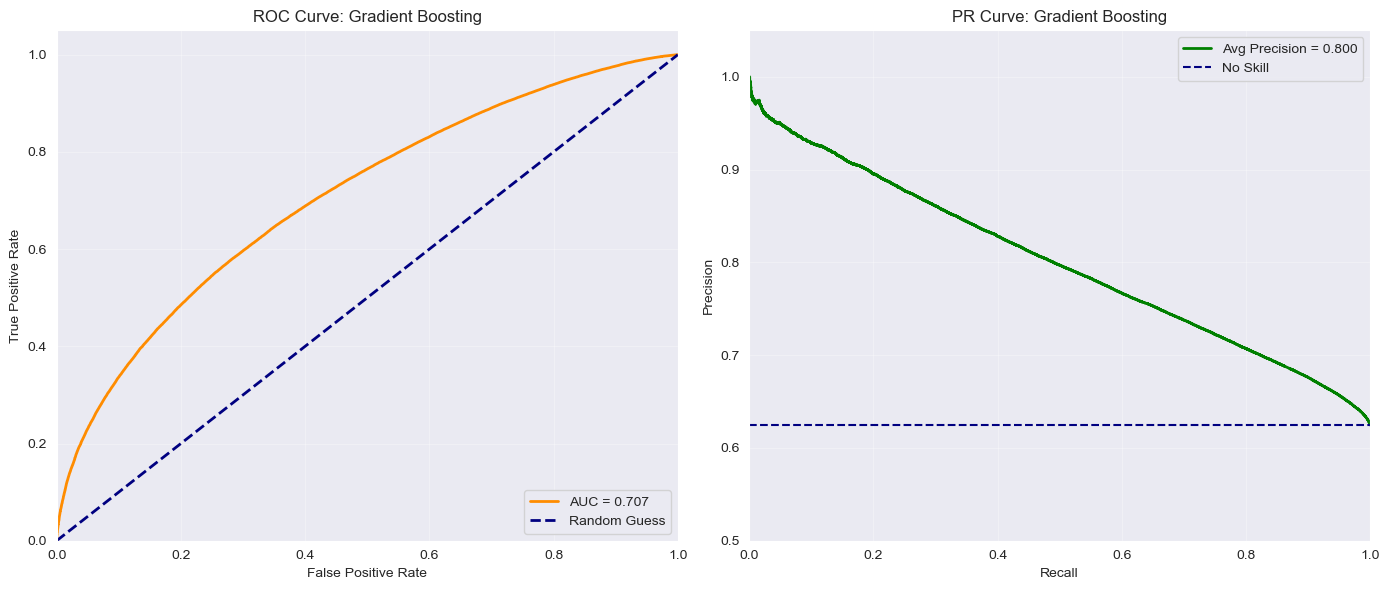

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=SEED)
results.append(
    evaluate_and_graph(gb, X_train, y_train, X_test, y_test, "Gradient Boosting", True)
)

# PCA + LR/Random Forest/SVM

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=SEED)

# --- PCA on CAT features (full train/test) ---

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"[CAT] Original feature count: {X_train.shape[1]}")
print(f"[CAT] Reduced feature count:  {X_train_pca.shape[1]}")

[CAT] Original feature count: 36
[CAT] Reduced feature count:  22


--- PCA + Logistic Regression ---
Train Accuracy: 0.6085 | Train AUC: 0.6536
Test  Accuracy: 0.6140 | Test  AUC: 0.6527
✅ Model seems balanced
------------------------------


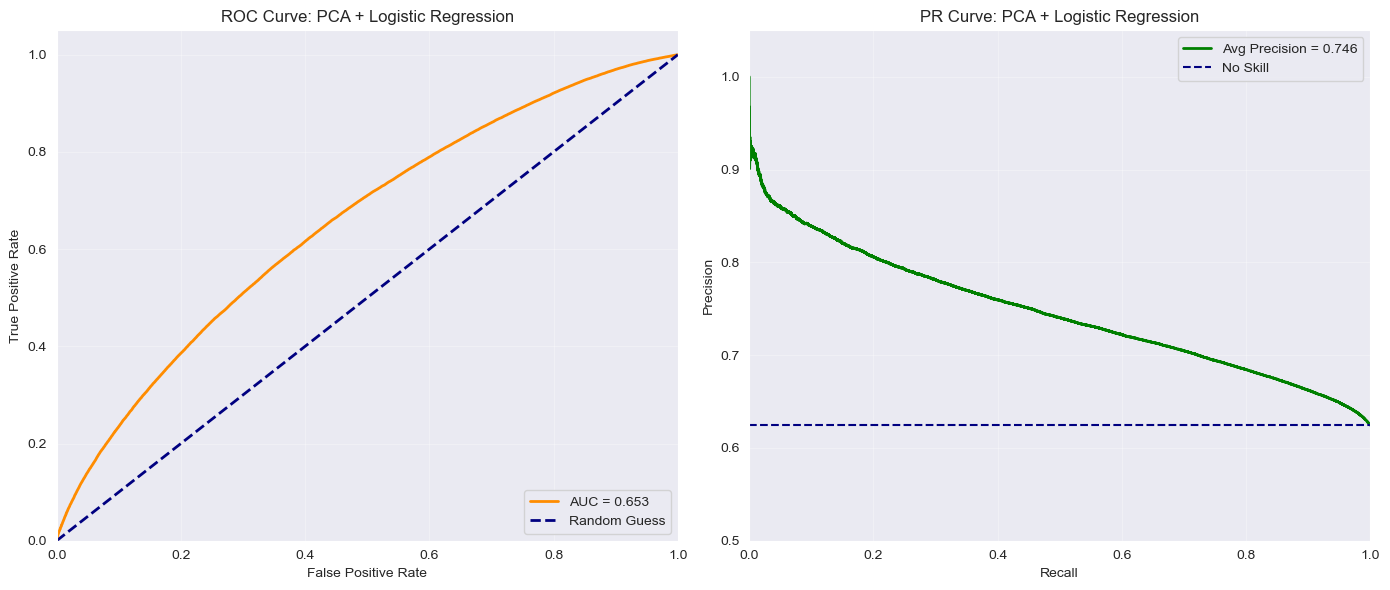

--- PCA + Random Forest ---
Train Accuracy: 0.6429 | Train AUC: 0.7048
Test  Accuracy: 0.6187 | Test  AUC: 0.6630
✅ Model seems balanced
------------------------------


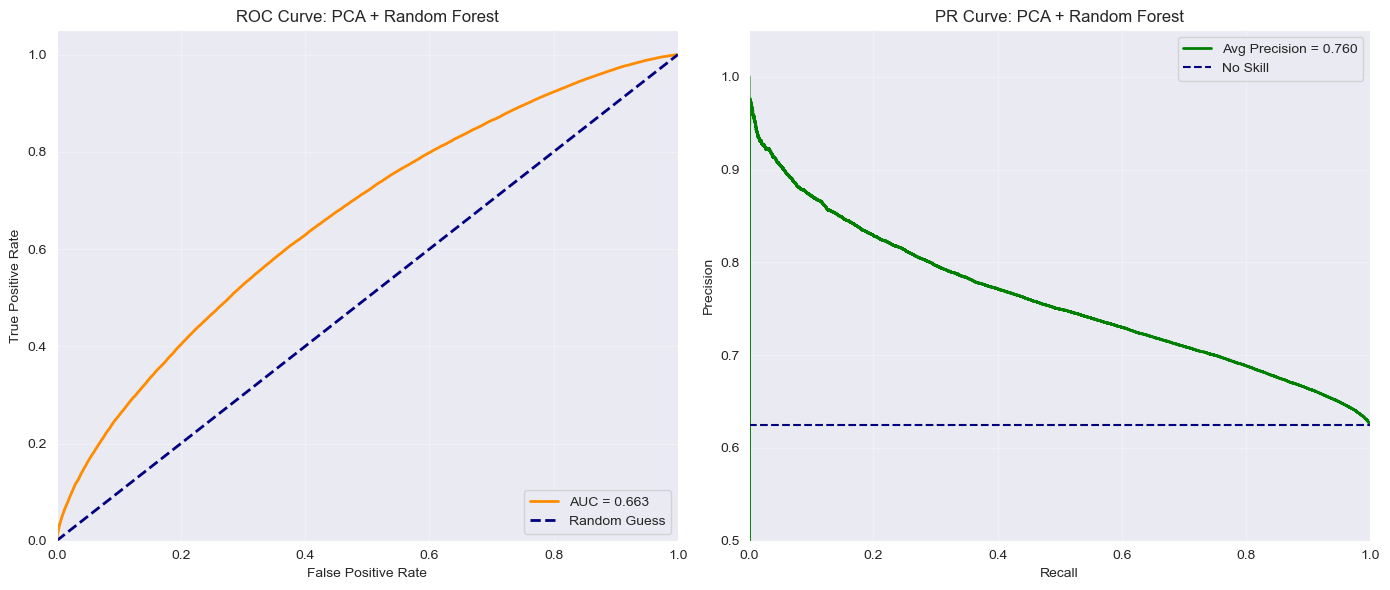

In [30]:
lr_pca = LogisticRegression(max_iter=1000, random_state=SEED)
results.append(
    evaluate_and_graph(lr_pca, X_train_pca, y_train, X_test_pca, y_test, "PCA + Logistic Regression", True)
)

rf_pca = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=SEED)
results.append(
    evaluate_and_graph(rf_pca, X_train_pca, y_train, X_test_pca, y_test, "PCA + Random Forest", True)
)

In [31]:
# --- PCA on CAT mini for SVM ---

pca_mini = PCA(n_components=0.95, random_state=SEED)

X_train_pca_mini = pca_mini.fit_transform(X_train_mini)
X_test_pca_mini  = pca_mini.transform(X_test_mini)

print(f"[CAT mini] Reduced dims: {X_train_pca_mini.shape[1]}")

[CAT mini] Reduced dims: 22


--- PCA + SVM (RBF) ---
Train Accuracy: 0.6980 | Train AUC: 0.7722
Test  Accuracy: 0.5921 | Test  AUC: 0.6254
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


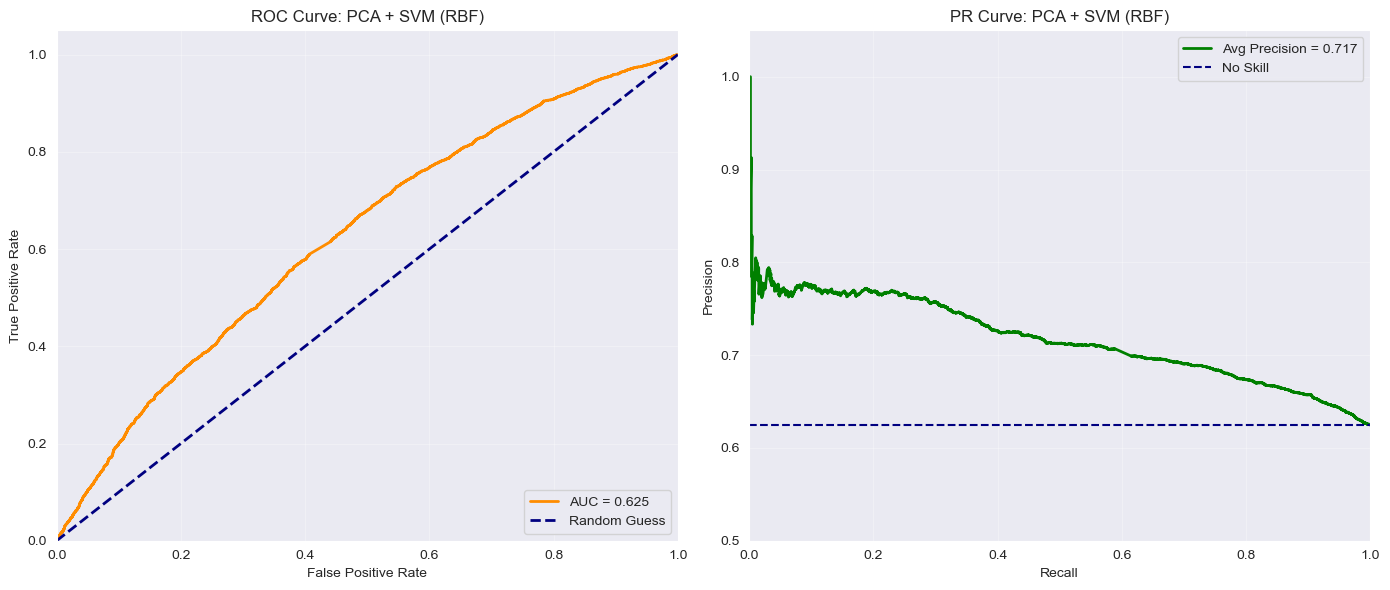

In [32]:
svm_pca = SVC(kernel='rbf', probability=True, random_state=SEED)
results.append(
    evaluate_and_graph(svm_pca, X_train_pca_mini, y_train_mini, X_test_pca_mini, y_test_mini, "PCA + SVM (RBF)", True)
)

# Results

In [33]:
with pd.option_context('display.max_rows', None):
    display(pd.DataFrame(results))

,model,accuracy,auc,average_precision,train_accuracy,train_auc
0,PLA,0.513033,0.538416,0.651718,0.523793,0.537862
1,Logistic Regression,0.628548,0.695317,0.791999,0.637847,0.696061
2,Softmax Regression,0.628562,0.695315,0.791999,0.637841,0.696058
3,LDA,0.626548,0.694836,0.791782,0.637515,0.695521
4,QDA,0.617776,0.689310,0.788027,0.634146,0.691093
5,Naive Bayes (Gaussian),0.590938,0.676952,0.776557,0.622136,0.677988
6,Naive Bayes (Bernoulli),0.614743,0.666025,0.770847,0.617669,0.666418
7,SVM (Linear),0.617600,0.689084,0.786314,0.641100,0.702129
8,SVM (Polynomial),0.590200,0.648847,0.747231,0.739200,0.818471
9,SVM (RBF),0.610100,0.671332,0.768325,0.727000,0.809774


In [34]:
def pick_best_model(dataframe, overfit_threshold=0.05):
    if dataframe is None or dataframe.empty:
        print("No models provided (empty DataFrame).")
        return None

    df = dataframe.copy()

    df['overfitting_gap'] = df['train_auc'] - df['auc']
    df['is_overfit'] = df['overfitting_gap'] > overfit_threshold

    df_valid = df[df['is_overfit'] == False].copy()
    df_overfit = df[df['is_overfit'] == True].copy()

    print(f"Total Models: {len(df)}")
    print(f"Valid Models: {len(df_valid)}")
    print(f"Disqualified Models: {len(df_overfit)}")

    if not df_overfit.empty:
        print("\n⚠️ The following models were disqualified due to overfitting:")
        display(df_overfit[['model', 'accuracy', 'auc', 'train_auc', 'overfitting_gap']])
    else:
        print("\n✅ No models were disqualified for overfitting.")

    if df_valid.empty:
        print("\n⚠️ All models are overfitting (by the chosen threshold).")
        print("Falling back to ranking ALL models by AUC.")
        df_valid = df.copy()

    print("Best by Accuracy:")
    display(df_valid.sort_values(by="accuracy", ascending=False).head(1))

    print("Best by AUC:")
    display(df_valid.sort_values(by="auc", ascending=False).head(1))

    print("Best by Average Precision:")
    display(df_valid.sort_values(by="average_precision", ascending=False).head(1))

    df_valid_ranked = df_valid.copy()
    df_valid_ranked["rank_acc"] = df_valid["accuracy"].rank(ascending=False)
    df_valid_ranked["rank_auc"] = df_valid["auc"].rank(ascending=False)
    df_valid_ranked["rank_ap"] = df_valid["average_precision"].rank(ascending=False)


    final_ranking = df_valid_ranked.sort_values(
        by=["rank_auc", "rank_acc", "rank_ap"]
    )

    cols = ['model', 'accuracy', 'auc', 'average_precision', 'overfitting_gap']
    print("\nFinal ranking (higher = better):")
    display(final_ranking[cols])

    best_model_row = final_ranking.iloc[0]
    best_model_name = best_model_row['model']
    print(f"\n🏆 Best model: {best_model_name}")

    return best_model_name

In [35]:
df = pd.DataFrame(results)
pick_best_model(df, overfit_threshold=0.05)

Total Models: 18
Valid Models: 14
Disqualified Models: 4

⚠️ The following models were disqualified due to overfitting:


,model,accuracy,auc,train_auc,overfitting_gap
8,SVM (Polynomial),0.590200,0.648847,0.818471,0.169625
9,SVM (RBF),0.610100,0.671332,0.809774,0.138443
12,Bagging (Trees),0.658633,0.687116,1.000000,0.312884
17,PCA + SVM (RBF),0.592100,0.625399,0.772171,0.146773


Best by Accuracy:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
14,Gradient Boosting,0.636286,0.707066,0.800289,0.649236,0.710136,0.00307,False


Best by AUC:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
14,Gradient Boosting,0.636286,0.707066,0.800289,0.649236,0.710136,0.00307,False


Best by Average Precision:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
14,Gradient Boosting,0.636286,0.707066,0.800289,0.649236,0.710136,0.00307,False



Final ranking (higher = better):


,model,accuracy,auc,average_precision,overfitting_gap
14,Gradient Boosting,0.636286,0.707066,0.800289,0.003070
13,Random Forest,0.628981,0.698010,0.793501,0.019537
1,Logistic Regression,0.628548,0.695317,0.791999,0.000744
2,Softmax Regression,0.628562,0.695315,0.791999,0.000742
3,LDA,0.626548,0.694836,0.791782,0.000685
11,Decision Tree (Entropy),0.626576,0.690632,0.781692,0.017055
4,QDA,0.617776,0.689310,0.788027,0.001783
10,Decision Tree (Gini),0.624495,0.689246,0.779922,0.020558
7,SVM (Linear),0.617600,0.689084,0.786314,0.013045
5,Naive Bayes (Gaussian),0.590938,0.676952,0.776557,0.001036



🏆 Best model: Gradient Boosting


'Gradient Boosting'

# Hyperparameter Tuning

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, loguniform

gb_hyper = GradientBoostingClassifier(random_state=SEED)
rf_hyper = RandomForestClassifier(random_state=SEED)
dt_hyper_entropy = DecisionTreeClassifier(criterion='entropy', random_state=SEED)

param_distributions_gb = {
    'n_estimators': randint(low=50, high=500),
    'learning_rate': loguniform(0.001, 0.2),
    'max_depth': randint(3, 8)
}

param_distributions_rf = {
    'n_estimators': randint(low=100, high=500),
    'max_depth': [10, 20, 30],
    'min_samples_split': randint(2, 20),
    'max_features': ['sqrt', 'log2', 0.6, 0.8]
}

param_distributions_dt = {
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

N_ITERATIONS = 5

random_search_gb = RandomizedSearchCV(
    estimator=gb_hyper,
    param_distributions=param_distributions_gb,
    n_iter=N_ITERATIONS,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=SEED
)

random_search_rf = RandomizedSearchCV(
    estimator=rf_hyper,
    param_distributions=param_distributions_rf,
    n_iter=N_ITERATIONS,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=SEED
)

random_search_dt = RandomizedSearchCV(
    estimator=dt_hyper_entropy,
    param_distributions=param_distributions_dt,
    n_iter=N_ITERATIONS*10,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=SEED
)


Starting GridSearchCV for Gradient Boosting...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
--- Gradient Boosting (Tuned) Results ---
Best Parameters: {'learning_rate': 0.0483437145318464, 'max_depth': 7, 'n_estimators': 70}
Best Score: 0.717644252779491
--- Gradient Boosting (Tuned) ---
Train Accuracy: 0.6606 | Train AUC: 0.7243
Test  Accuracy: 0.6422 | Test  AUC: 0.7122
✅ Model seems balanced
------------------------------


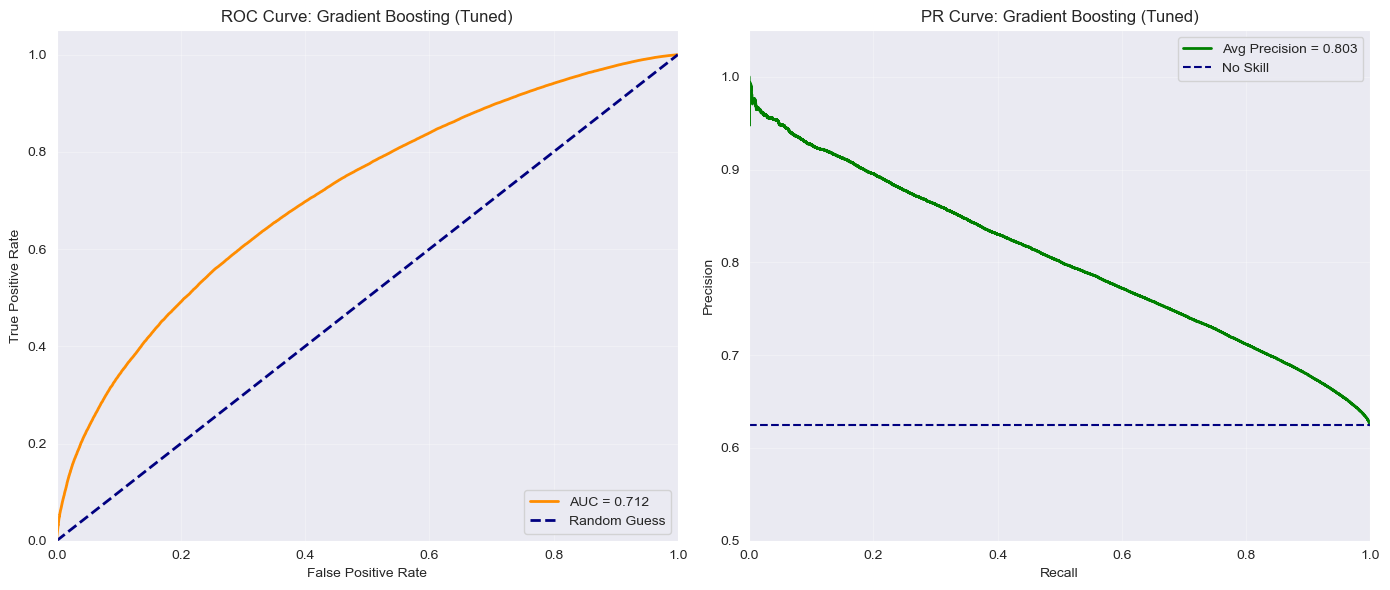

In [37]:
print("\nStarting GridSearchCV for Gradient Boosting...")
random_search_gb.fit(X_train, y_train)

print("--- Gradient Boosting (Tuned) Results ---")
print(f"Best Parameters: {random_search_gb.best_params_}")
print(f"Best Score: {random_search_gb.best_score_}")

best_random_search_gb = random_search_gb.best_estimator_

results.append(
    evaluate_and_graph(best_random_search_gb, X_train, y_train, X_test, y_test, "Gradient Boosting (Tuned)", True)
)

Starting GridSearchCV for Random Forest...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
--- Random Forest Results ---
Best Parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 443}
Best Score: 0.8978283471107623
--- Random Forest (Tuned) ---
Train Accuracy: 1.0000 | Train AUC: 1.0000
Test  Accuracy: 0.6659 | Test  AUC: 0.6998
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


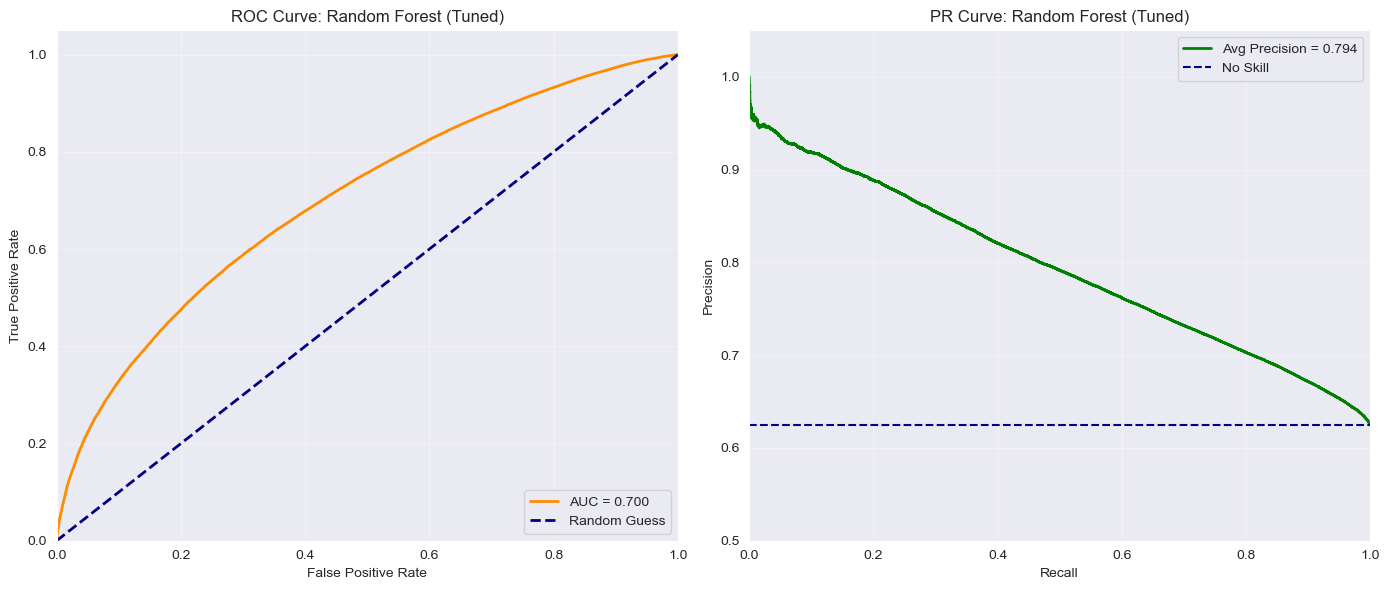

In [38]:
print("Starting GridSearchCV for Random Forest...")
random_search_rf.fit(X_train, y_train)

print("--- Random Forest Results ---")
print(f"Best Parameters: {random_search_rf.best_params_}")
print(f"Best Score: {random_search_rf.best_score_}")

best_random_search_rf = random_search_rf.best_estimator_

results.append(
    evaluate_and_graph(best_random_search_rf, X_train, y_train, X_test, y_test, "Random Forest (Tuned)", True)
)


Starting GridSearchCV for Decision Tree (Entropy)...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
--- Decision Tree (Entropy) Results ---
Best Parameters: {'max_depth': 27, 'min_samples_leaf': 4, 'min_samples_split': 4}
Best Score: 0.7375136767537714
--- Decision Tree (Entropy, Tuned) ---
Train Accuracy: 0.8907 | Train AUC: 0.9701
Test  Accuracy: 0.5915 | Test  AUC: 0.5840
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


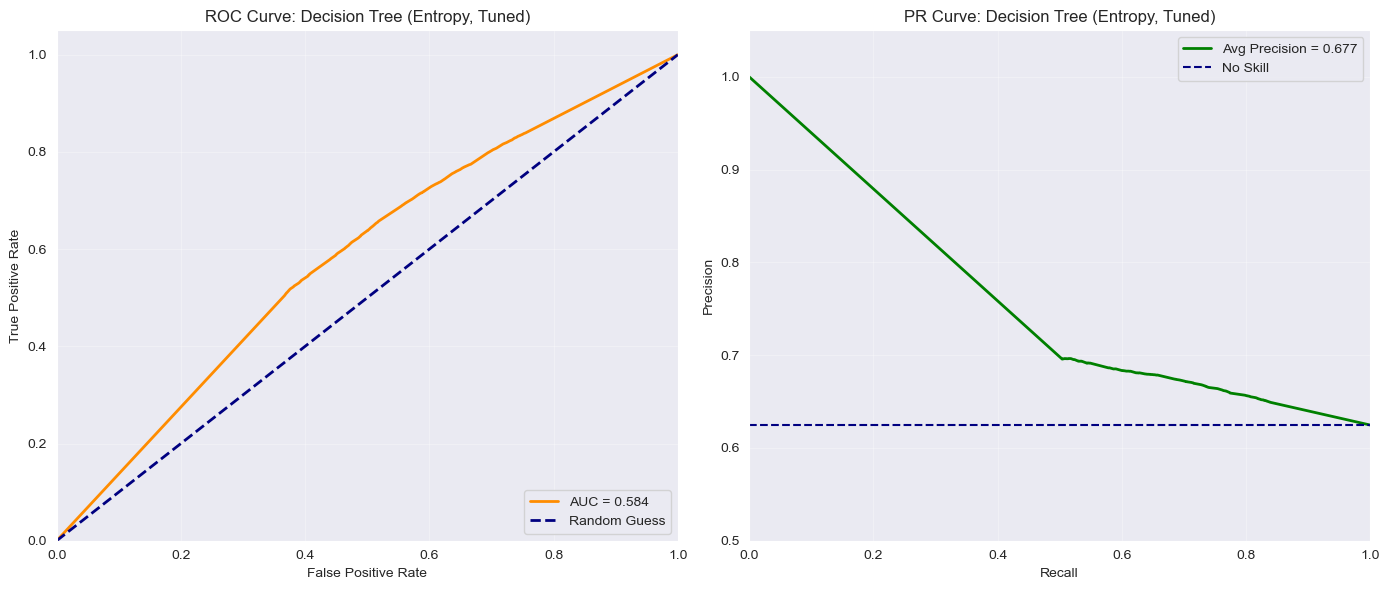

In [39]:
print("\nStarting GridSearchCV for Decision Tree (Entropy)...")
random_search_dt.fit(X_train, y_train)

print("--- Decision Tree (Entropy) Results ---")
print(f"Best Parameters: {random_search_dt.best_params_}")
print(f"Best Score: {random_search_dt.best_score_}")

best_random_search_dt = random_search_dt.best_estimator_

results.append(
    evaluate_and_graph(best_random_search_dt, X_train, y_train, X_test, y_test, "Decision Tree (Entropy, Tuned)", True)
)

# Results Final

In [43]:
df = pd.DataFrame(results)
best_model = pick_best_model(df, overfit_threshold=0.05)

Total Models: 21
Valid Models: 15
Disqualified Models: 6

⚠️ The following models were disqualified due to overfitting:


,model,accuracy,auc,train_auc,overfitting_gap
8,SVM (Polynomial),0.590200,0.648847,0.818471,0.169625
9,SVM (RBF),0.610100,0.671332,0.809774,0.138443
12,Bagging (Trees),0.658633,0.687116,1.000000,0.312884
17,PCA + SVM (RBF),0.592100,0.625399,0.772171,0.146773
19,Random Forest (Tuned),0.665857,0.699793,1.000000,0.300207
20,"Decision Tree (Entropy, Tuned)",0.591481,0.583990,0.970115,0.386125


Best by Accuracy:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
18,Gradient Boosting (Tuned),0.642224,0.71221,0.802659,0.66059,0.724286,0.012076,False


Best by AUC:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
18,Gradient Boosting (Tuned),0.642224,0.71221,0.802659,0.66059,0.724286,0.012076,False


Best by Average Precision:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
18,Gradient Boosting (Tuned),0.642224,0.71221,0.802659,0.66059,0.724286,0.012076,False



Final ranking (higher = better):


,model,accuracy,auc,average_precision,overfitting_gap
18,Gradient Boosting (Tuned),0.642224,0.712210,0.802659,0.012076
14,Gradient Boosting,0.636286,0.707066,0.800289,0.003070
13,Random Forest,0.628981,0.698010,0.793501,0.019537
1,Logistic Regression,0.628548,0.695317,0.791999,0.000744
2,Softmax Regression,0.628562,0.695315,0.791999,0.000742
3,LDA,0.626548,0.694836,0.791782,0.000685
11,Decision Tree (Entropy),0.626576,0.690632,0.781692,0.017055
4,QDA,0.617776,0.689310,0.788027,0.001783
10,Decision Tree (Gini),0.624495,0.689246,0.779922,0.020558
7,SVM (Linear),0.617600,0.689084,0.786314,0.013045



🏆 Best model: Gradient Boosting (Tuned)


# Submission for Kaggle

Manual Process, must use results to correctly call the best model

In [49]:
testing_scaled_num = scaler.transform(testing[vars_dict["true_numerical_vars"]])
testing_scaled_df = pd.DataFrame(
    testing_scaled_num,
    columns=vars_dict["true_numerical_vars"],
    index=testing.index
)

testing_dummies = pd.get_dummies(testing[vars_dict["true_categorical_vars"]], drop_first=True)

_, testing_encoded_aligned = X_train_encoded.align(
    testing_dummies,
    join='left',
    axis=1,
    fill_value=0
)

testing_final = pd.concat([testing_scaled_df, testing_encoded_aligned], axis=1)

print(f"Training shape: {testing_scaled_df.shape}")
print(f"Testing shape:  {testing_final.shape}")

Training shape: (300000, 15)
Testing shape:  (300000, 36)


In [51]:
predictions = best_random_search_gb.predict_proba(testing_final)[:, 1]

submission = pd.DataFrame({
    'id': testing.index,
    'diagnosed_diabetes': predictions
})

submission.to_csv('tuned_5_gradient_boosting.csv', index=False)

print("Submission saved successfully!")
submission.head()

Submission saved successfully!


,id,diagnosed_diabetes
0,700000,0.393771
1,700001,0.477057
2,700002,0.596192
3,700003,0.383979
4,700004,0.785315
